In [ ]:
import os
import cv2
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import keras
from keras.layers import Input
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

Device: cpu
Num classes: 15
Epoch 1/40 | Loss: 2.8939 | Train Acc: 0.1437
Epoch 2/40 | Loss: 2.5432 | Train Acc: 0.1812
Epoch 3/40 | Loss: 2.4401 | Train Acc: 0.2182
Epoch 4/40 | Loss: 2.3826 | Train Acc: 0.2298
Epoch 5/40 | Loss: 2.3287 | Train Acc: 0.2403
Epoch 6/40 | Loss: 2.3104 | Train Acc: 0.2603
Epoch 7/40 | Loss: 2.2652 | Train Acc: 0.2765
Epoch 8/40 | Loss: 2.1498 | Train Acc: 0.3035
Epoch 9/40 | Loss: 2.1433 | Train Acc: 0.3022
Epoch 10/40 | Loss: 2.1082 | Train Acc: 0.3238
Epoch 11/40 | Loss: 1.9692 | Train Acc: 0.3707
Epoch 12/40 | Loss: 1.8794 | Train Acc: 0.3942
Epoch 13/40 | Loss: 1.8500 | Train Acc: 0.4090
Epoch 14/40 | Loss: 1.7890 | Train Acc: 0.4248
Epoch 15/40 | Loss: 1.7868 | Train Acc: 0.4405
Epoch 16/40 | Loss: 1.7263 | Train Acc: 0.4497
Epoch 17/40 | Loss: 1.7116 | Train Acc: 0.4553
Epoch 18/40 | Loss: 1.6697 | Train Acc: 0.4700
Epoch 19/40 | Loss: 1.6254 | Train Acc: 0.4850
Epoch 20/40 | Loss: 1.5799 | Train Acc: 0.4928
Epoch 21/40 | Loss: 1.5077 | Train Acc: 0

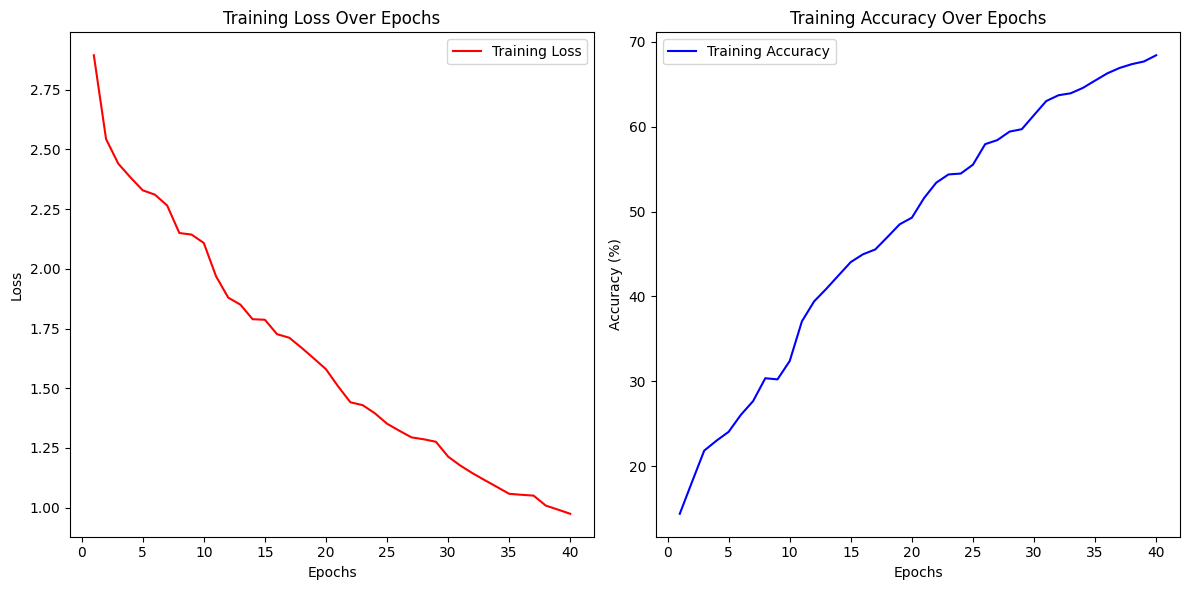

Validation Loss: 1.1596 | Validation Accuracy: 65.87%

Convolutional Neural Network Classifier Performance:

              precision    recall  f1-score   support

   n01768244     0.6981    0.7400    0.7184       100
   n02074367     0.8505    0.9100    0.8792       100
   n02099712     0.5446    0.5500    0.5473       100
   n02123045     0.6100    0.6100    0.6100       100
   n02123394     0.8095    0.5100    0.6258       100
   n02190166     0.6914    0.5600    0.6188       100
   n02206856     0.4878    0.6000    0.5381       100
   n02226429     0.5789    0.5500    0.5641       100
   n02423022     0.7400    0.7400    0.7400       100
   n02791270     0.6053    0.6900    0.6449       100
   n02917067     0.8317    0.8400    0.8358       100
   n03085013     0.7053    0.6700    0.6872       100
   n03126707     0.7059    0.7200    0.7129       100
   n03179701     0.6154    0.7200    0.6636       100
   n03250847     0.4947    0.4700    0.4821       100

    accuracy             

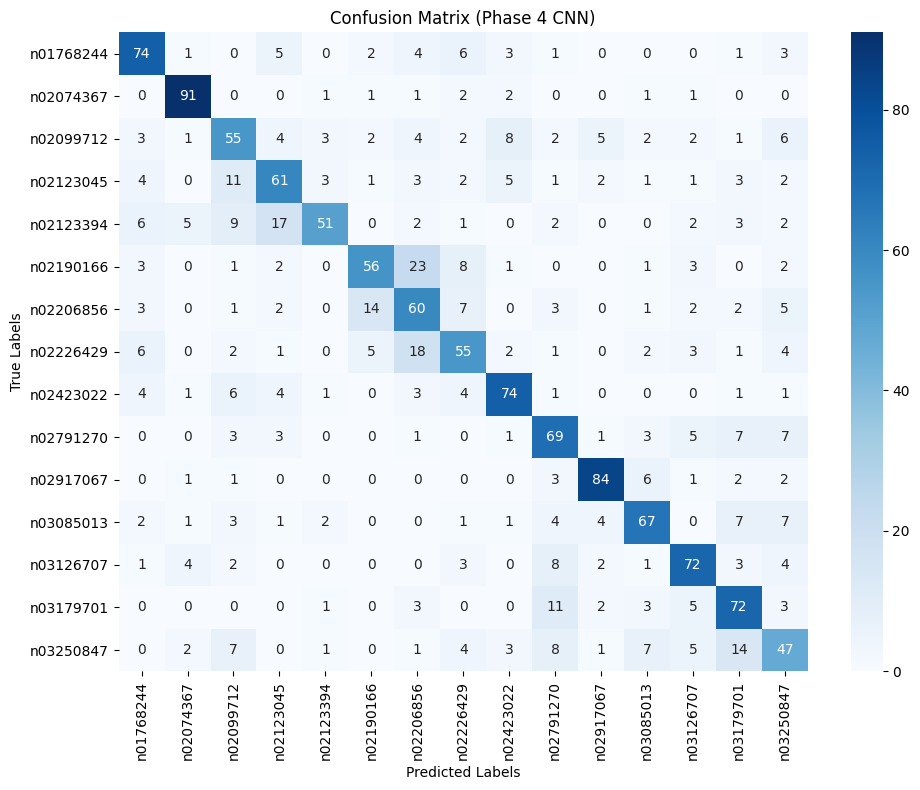


Saved outputs to:
 - /Users/maheshnilewar/Documents/Github/image_classification/results/models/phase4_cnn_advanced.pth
 - /Users/maheshnilewar/Documents/Github/image_classification/results/figures/phase4_cnn_advanced_training_curves.png
 - /Users/maheshnilewar/Documents/Github/image_classification/results/metrics/phase4_cnn_advanced_classification_report.txt
 - /Users/maheshnilewar/Documents/Github/image_classification/results/metrics/phase4_cnn_advanced_summary.json
 - /Users/maheshnilewar/Documents/Github/image_classification/results/figures/phase4_cnn_advanced_confusion_matrix.png
 - /Users/maheshnilewar/Documents/Github/image_classification/results/metrics/phase4_cnn_advanced_confusion_matrix.csv


In [2]:
# ============================================
# Phase 4 (PyTorch): Advanced CNN with augmentation
# + Saving outputs to:
# /Users/maheshnilewar/Documents/Github/image_classification/results
# Saves:
#   results/models/phase4_cnn_advanced.pth
#   results/figures/phase4_cnn_training_curves.png
#   results/figures/phase4_cnn_confusion_matrix.png
#   results/metrics/phase4_cnn_classification_report.txt
#   results/metrics/phase4_cnn_confusion_matrix.csv
#   results/metrics/phase4_cnn_summary.json
# ============================================

import os
import json
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# ---------- Results directories (YOUR LOCATION) ----------
RESULTS_DIR = "/Users/maheshnilewar/Documents/Github/image_classification/results"
FIG_DIR = os.path.join(RESULTS_DIR, "figures")
METRICS_DIR = os.path.join(RESULTS_DIR, "metrics")
MODELS_DIR = os.path.join(RESULTS_DIR, "models")
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(METRICS_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

run_name = "phase4_cnn_advanced"


# ---------- Parameters ----------
input_size = (128, 128)
batch_size = 32
epochs = 40
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ---------- Dataset paths ----------
train_path = "/Users/maheshnilewar/Documents/Github/image_classification/train"
val_path   = "/Users/maheshnilewar/Documents/Github/image_classification/test"


# ---------- Load train dataset first to get classes ----------
train_dataset = datasets.ImageFolder(root=train_path)
class_names = train_dataset.classes
num_classes = len(class_names)
print("Num classes:", num_classes)

# ---------- Transforms ----------
train_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(128, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

val_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Reapply transforms after getting class info
train_dataset.transform = train_transform
val_dataset = datasets.ImageFolder(root=val_path, transform=val_transform)

# ---------- DataLoaders ----------
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


# ---------- Model ----------
class AdvancedCNN(nn.Module):
    def __init__(self, num_classes):
        super(AdvancedCNN, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2, 2)
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 8 * 8, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


model = AdvancedCNN(num_classes).to(device)

# ---------- Loss / Optimizer / Scheduler ----------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)


# ---------- Training ----------
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    scheduler.step()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total  # as fraction
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")


# ---------- Save model ----------
model_path = os.path.join(MODELS_DIR, f"{run_name}.pth")
torch.save(model.state_dict(), model_path)
print("Saved model:", model_path)


# ---------- Save training curves ----------
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label="Training Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, [a * 100 for a in train_accuracies], label="Training Accuracy", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy Over Epochs")
plt.legend()

plt.tight_layout()
curves_path = os.path.join(FIG_DIR, f"{run_name}_training_curves.png")
plt.savefig(curves_path, dpi=300, bbox_inches="tight")
plt.show()


# ---------- Validation evaluation ----------
model.eval()
val_running_loss = 0.0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        val_running_loss += loss.item()
        _, predicted = outputs.max(1)

        all_preds.extend(predicted.cpu().numpy().tolist())
        all_labels.extend(labels.cpu().numpy().tolist())

val_loss = val_running_loss / len(val_loader)
val_acc = accuracy_score(all_labels, all_preds)

print(f"Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc*100:.2f}%")


# ---------- Classification report ----------
report = classification_report(
    all_labels, all_preds,
    target_names=class_names,
    digits=4,
    zero_division=0
)
print("\nConvolutional Neural Network Classifier Performance:\n")
print(report)

report_path = os.path.join(METRICS_DIR, f"{run_name}_classification_report.txt")
with open(report_path, "w") as f:
    f.write(report)
    f.write(f"\n\nValidation Loss: {val_loss}\nValidation Accuracy: {val_acc}\n")

# ---------- Confusion matrix ----------
cm = confusion_matrix(all_labels, all_preds)

cm_csv_path = os.path.join(METRICS_DIR, f"{run_name}_confusion_matrix.csv")
np.savetxt(cm_csv_path, cm, delimiter=",")

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Phase 4 CNN)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

cm_fig_path = os.path.join(FIG_DIR, f"{run_name}_confusion_matrix.png")
plt.savefig(cm_fig_path, dpi=300, bbox_inches="tight")
plt.show()


# ---------- Save summary.json ----------
summary = {
    "run_name": run_name,
    "phase": 4,
    "model": "AdvancedCNN (4 conv blocks + FC head)",
    "train_path": train_path,
    "val_path": val_path,
    "input_size": list(input_size),
    "batch_size": batch_size,
    "epochs": epochs,
    "optimizer": "Adam(lr=0.001)",
    "scheduler": "StepLR(step_size=10, gamma=0.7)",
    "num_classes": int(num_classes),
    "train_final_loss": float(train_losses[-1]) if len(train_losses) else None,
    "train_final_accuracy": float(train_accuracies[-1]) if len(train_accuracies) else None,
    "val_loss": float(val_loss),
    "val_accuracy": float(val_acc),
    "saved_model": model_path,
    "saved_curves": curves_path,
    "saved_report": report_path,
    "saved_confusion_matrix_png": cm_fig_path,
    "saved_confusion_matrix_csv": cm_csv_path
}

summary_path = os.path.join(METRICS_DIR, f"{run_name}_summary.json")
with open(summary_path, "w") as f:
    json.dump(summary, f, indent=2)

print("\nSaved outputs to:")
print(" -", model_path)
print(" -", curves_path)
print(" -", report_path)
print(" -", summary_path)
print(" -", cm_fig_path)
print(" -", cm_csv_path)